<a href="https://colab.research.google.com/github/Shirley31415926/API_heatwave/blob/main/07A_Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("stm")
install.packages("quanteda")
install.packages("textclean")
install.packages("jsonlite")
install.packages("readr")
install.packages("stringr")
install.packages("tm")

library(stm)
library(quanteda)
library(textclean)
library(jsonlite)
library(readr)
library(stringr)
library(tm)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## 2023

In [ ]:
json_data <- stream_in(file("/content/heat_posts2023.jsonl"))
texts     <- json_data$text

# text cleaning
texts_clean <- texts %>%
  replace_html() %>%
  replace_tag() %>%
  replace_symbol() %>%
  replace_emoji() %>%
  replace_contraction() %>%
  str_remove_all("[[:punct:]]") %>%
  str_remove_all("[[:digit:]]") %>%
  tolower() %>%
  str_squish()

toks <- tokens(texts_clean,
               remove_punct   = TRUE,
               remove_numbers = TRUE,
               remove_symbols = TRUE) %>%
  tokens_tolower() %>%
  tokens_remove(stopwords("en")) %>%
  tokens_wordstem("en") %>%
  tokens_keep(min_nchar = 3)

dtm <- dfm(toks) %>%
  dfm_trim(min_docfreq = 1, min_termfreq = 2) %>%
  dfm_select(pattern = "^[a-z]{3,}$", valuetype = "regex")

# check non-empty docs
message("Non-empty docs: ", sum(rowSums(dtm) > 0))

# STM
out <- convert(dtm, to = "stm")
set.seed(12345)
model <- stm(
  documents = out$documents,
  vocab     = out$vocab,
  K         = 6,
  init.type = "Spectral",
  LDAbeta   = FALSE,
  verbose   = TRUE
)

# topic
labelTopics(model, n = 12)
keep_idx   <- out$docs$doc_id
keep_texts <- texts_clean[keep_idx]
print(findThoughts(model, texts = keep_texts, n = 3))

plot(model, type = "summary")
plot(model, type = "labels", labeltype = "frex")


opening file input connection.



 Imported 1985 records. Simplifying...


closing file input connection.

Non-empty docs: 1972

Warning message in dfm2stm(x, docvars, omit_empty = TRUE):
“Dropped 1,985 empty document(s)”


Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	......
	 Recovering initialization...
 	.........................
Initialization complete.
.......................................................................................................
Completed E-Step (0 seconds). 
....................................................................................................
Completed M-Step (6 seconds). 
Completing Iteration 1 (approx. per word bound = -7.035) 
.......................................................................................................
Completed E-Step (0 seconds). 
....................................................................................................
Completed M-Step (6 seconds). 
Completing Iteration 2 (approx. per word bound = -6.821, relative change = 3.032e-02) 
.......................................................................................................
Completed E-Step (0 seconds). 

Topic 1 Top Words:
 	 Highest Prob: week, heatwav, summer, thing, septemb, hope, see, take, middl, part, day, fan 
 	 FREX: see, three, yet, take, mini, state, septemb, week, part, someth, middl, thing 
 	 Lift: increas, floor, three, took, nxt, build, yet, money, see, mini, cover, line 
 	 Score: week, summer, thing, septemb, see, hope, take, middl, part, someth, yet, three 
Topic 2 Top Words:
 	 Highest Prob: heatwav, today, back, end, fire, day, die, think, know, much, get, good 
 	 FREX: fire, die, think, end, gonna, texa, today, know, place, back, heatwav, short 
 	 Lift: fire, excit, chicago, short, park, gonna, sit, die, offic, texa, think, cut 
 	 Score: heatwav, today, fire, die, think, end, back, know, gonna, much, texa, month 
Topic 3 Top Words:
 	 Highest Prob: just, will, now, heatwav, tri, two, chang, hour, cold, heart, bit, wait 
 	 FREX: two, heart, percent, bit, chang, said, wait, tri, event, rais, autumn, run 
 	 Lift: tent, rais, fast, asia, percent, heart, updat, sh

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'print': Number of provided texts and number of documents modeled do not match


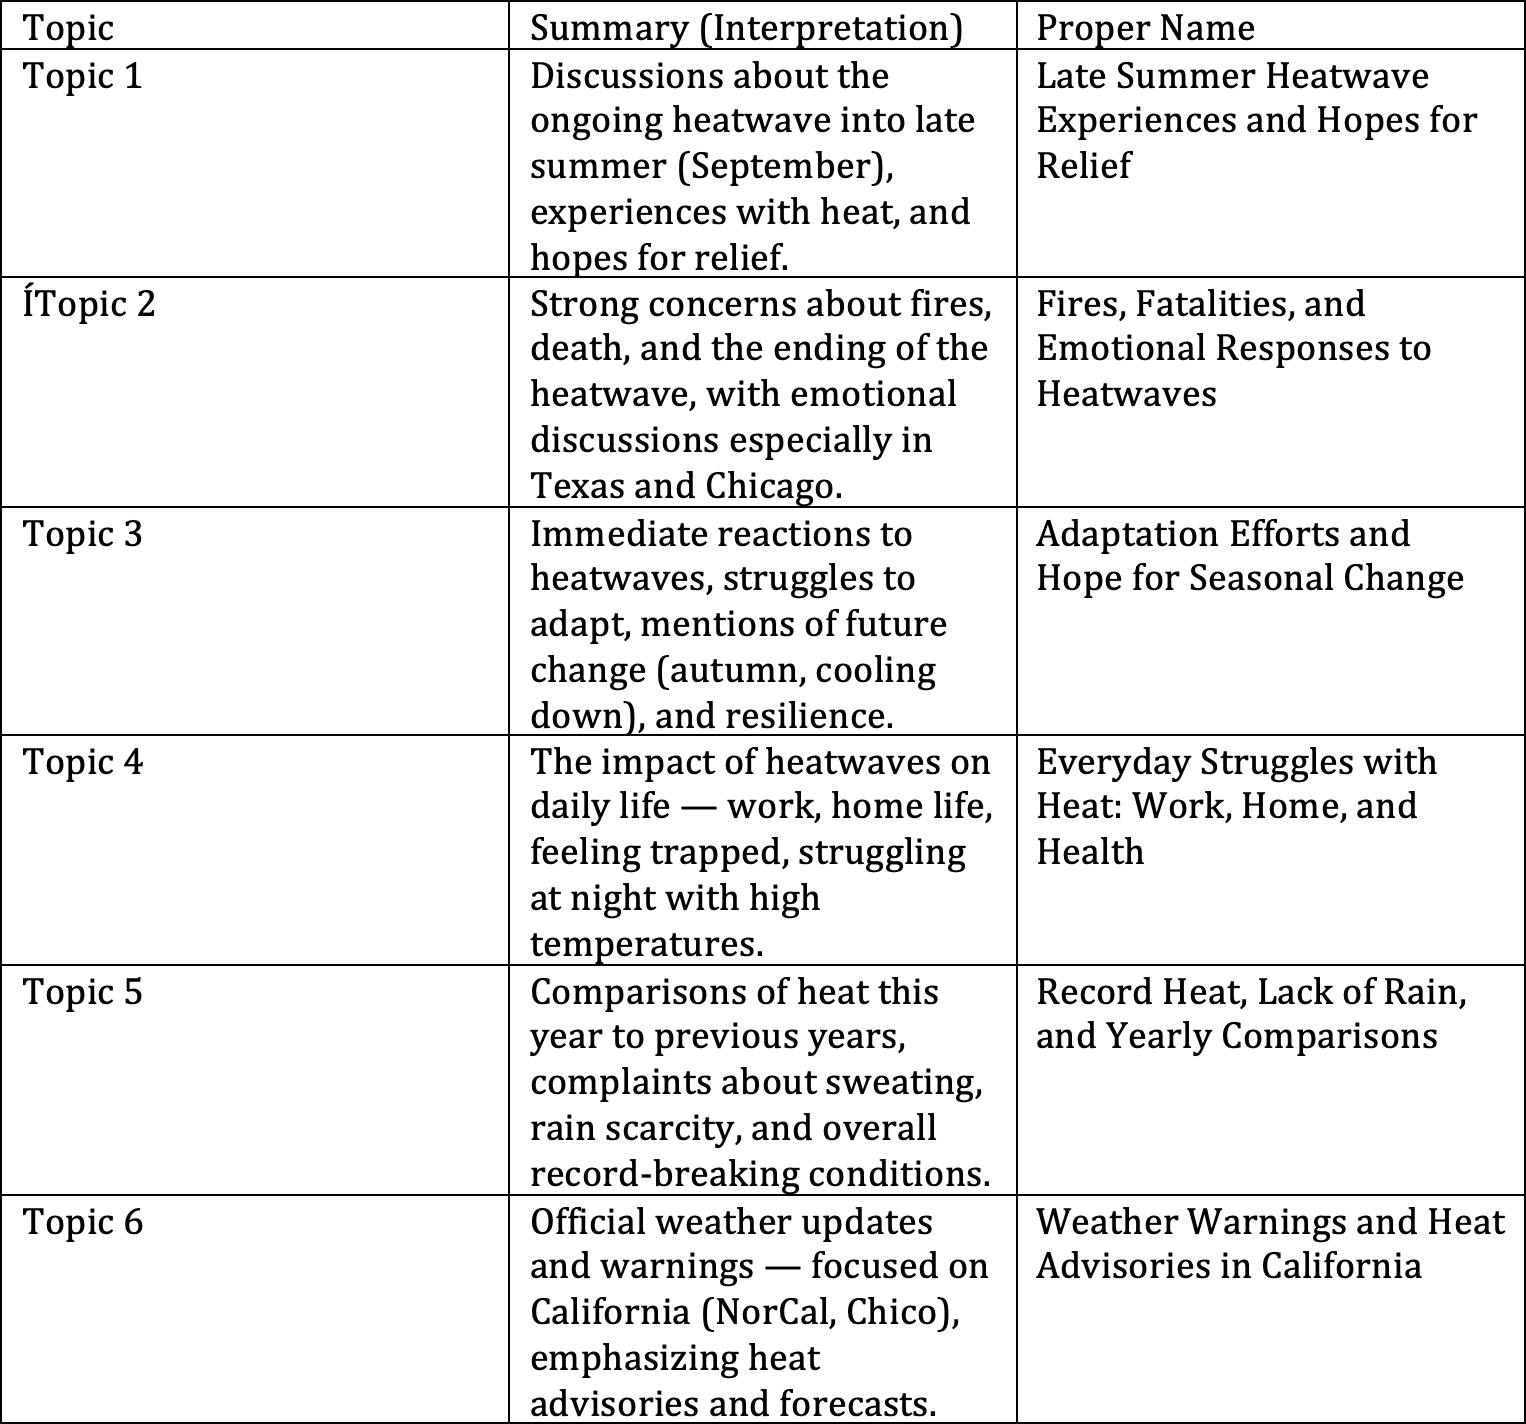

## 2024

In [ ]:
json_data <- stream_in(file("/content/heat_posts2024_standardized.jsonl"))
texts     <- json_data$text

# text cleaning
texts_clean <- texts %>%
  replace_html() %>%
  replace_tag() %>%
  replace_symbol() %>%
  replace_emoji() %>%
  replace_contraction() %>%
  str_remove_all("[[:punct:]]") %>%
  str_remove_all("[[:digit:]]") %>%
  tolower() %>%
  str_squish()

toks <- tokens(texts_clean,
               remove_punct   = TRUE,
               remove_numbers = TRUE,
               remove_symbols = TRUE) %>%
  tokens_tolower() %>%
  tokens_remove(stopwords("en")) %>%
  tokens_wordstem("en") %>%
  tokens_keep(min_nchar = 3)

dtm <- dfm(toks) %>%
  dfm_trim(min_docfreq = 1, min_termfreq = 2) %>%
  dfm_select(pattern = "^[a-z]{3,}$", valuetype = "regex")

# check non-empty docs
message("Non-empty docs: ", sum(rowSums(dtm) > 0))

# STM
out <- convert(dtm, to = "stm")
set.seed(12345)
model <- stm(
  documents = out$documents,
  vocab     = out$vocab,
  K         = 6,
  init.type = "Spectral",
  LDAbeta   = FALSE,
  verbose   = TRUE
)

labelTopics(model, n = 12)
keep_idx   <- out$docs$doc_id
keep_texts <- texts_clean[keep_idx]
print(findThoughts(model, texts = keep_texts, n = 3))

plot(model, type = "summary")
plot(model, type = "labels", labeltype = "frex")


opening file input connection.



 Imported 4050 records. Simplifying...


closing file input connection.

Non-empty docs: 4043

Warning message in dfm2stm(x, docvars, omit_empty = TRUE):
“Dropped 4,050 empty document(s)”


Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Finding anchor words...
 	......
	 Recovering initialization...
 	.........................................
Initialization complete.
.....................................................................................................
Completed E-Step (1 seconds). 
.....................................................................................................
Completed M-Step (13 seconds). 
Completing Iteration 1 (approx. per word bound = -7.144) 
.....................................................................................................
Completed E-Step (0 seconds). 
.....................................................................................................
Completed M-Step (12 seconds). 
Completing Iteration 2 (approx. per word bound = -6.939, relative change = 2.861e-02) 
.....................................................................................................
Completed E-Step

Topic 1 Top Words:
 	 Highest Prob: like, can, heatwav, last, one, good, feel, just, need, morn, right, first 
 	 FREX: window, feel, open, morn, nice, love, hous, broke, outsid, last, sound, littl 
 	 Lift: balloon, speech, grey, window, nope, broke, track, sick, imagin, listen, complet, lie 
 	 Score: like, can, last, feel, one, good, need, morn, right, outsid, love, window 
Topic 2 Top Words:
 	 Highest Prob: number, heatwav, climat, heat, wave, ecosearch, climatechang, chang, news, wildfir, summer, marin 
 	 FREX: ecosearch, climatechang, number, wave, extremeheat, info, climat, marin, wildfir, climatecrisi, amid, canada 
 	 Lift: physorg, scienc, ecosearch, digest, globalwarm, info, extremeheat, climatechang, photographi, northwest, pacif, earth 
 	 Score: number, climat, wave, ecosearch, heat, climatechang, wildfir, marin, chang, extremeheat, info, news 
Topic 3 Top Words:
 	 Highest Prob: get, heatwav, still, got, start, realli, think, look, fuck, work, thing, know 
 	 FREX: fuc

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'print': Number of provided texts and number of documents modeled do not match


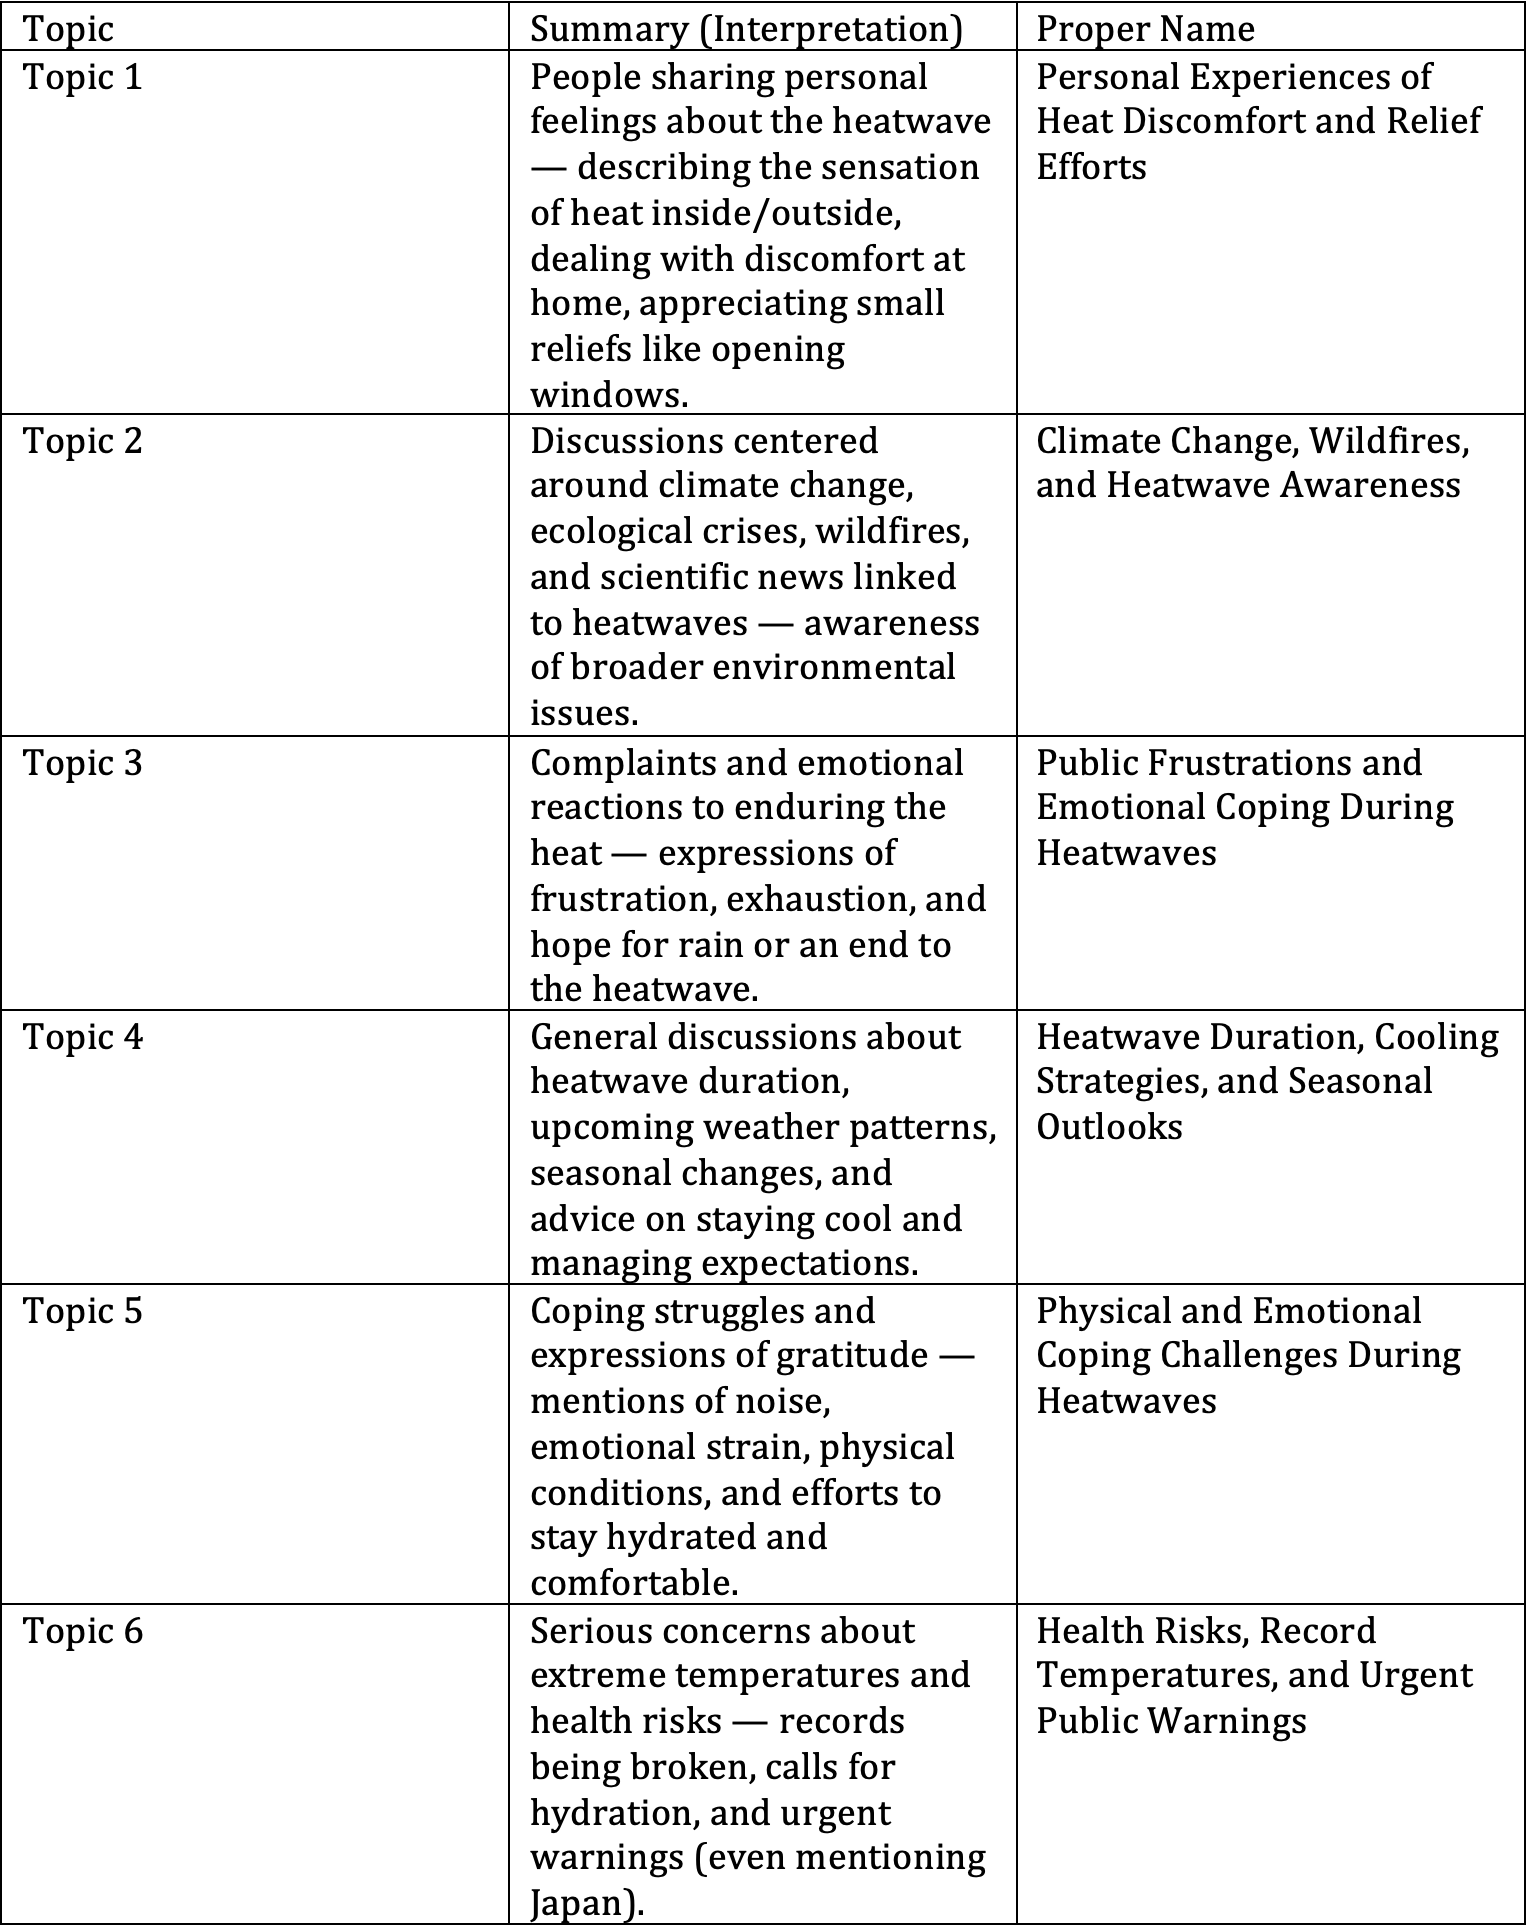